In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# for creating a responsive plot
%matplotlib widget

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Sine wave with different amplitude and wavelength

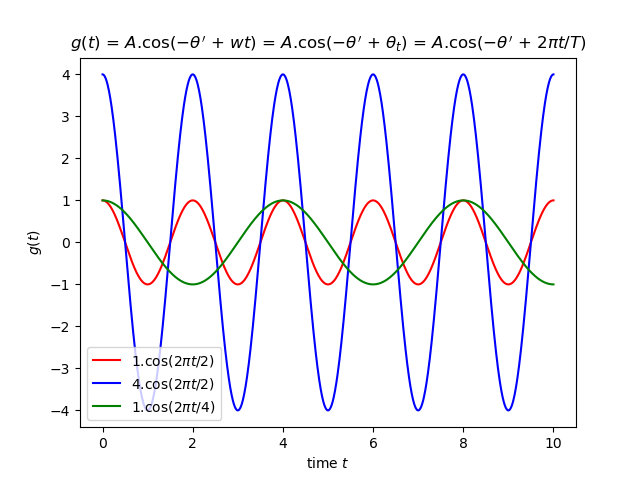

In [62]:
def get_cosinewave_y(A, T, theta, x):
    y = [A * math.cos(theta + 2*math.pi*i/T) for i in x]
    return y

#default sine wave
plt.figure()
x = np.linspace(0, 10, 1000)
theta = 0
y = get_cosinewave_y(A=1, T=2, theta=theta, x=x)
plt.plot(x, y, 'r', label=r'1.cos($2 \pi t$/2)')

# higher amplitude sine wave
y = get_cosinewave_y(A=4, T=2, theta=theta, x=x)
plt.plot(x, y, 'b', label=r'4.cos($2 \pi t$/2)')

# longer wave-length
y = get_cosinewave_y(A=1, T=4, theta=theta, x=x)
plt.plot(x, y, 'g', label=r'1.cos($2 \pi t$/4)')

plt.title(r'$g(t)$ = $A$.cos($-\theta^\prime$ + $wt$) = $A$.cos($-\theta^\prime$ + $\theta_t$) = $A$.cos($-\theta^\prime$ + $2 \pi t /T$)')
plt.xlabel(r'time $t$')
plt.ylabel(r'$g(t)$')
plt.legend()
plt.show()


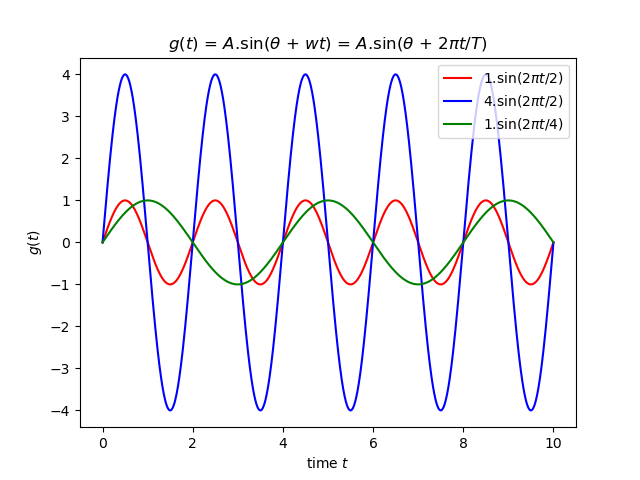

In [43]:
def get_sinewave_y(A, T, theta, x):
    y = [A * math.sin(theta + 2*math.pi*i/T) for i in x]
    return y

#default sine wave
plt.figure()
x = np.linspace(0, 10, 1000)
theta = 0
y = get_sinewave_y(A=1, T=2, theta=theta, x=x)
plt.plot(x, y, 'r', label=r'1.sin($2 \pi t$/2)')

# higher amplitude sine wave
y = get_sinewave_y(A=4, T=2, theta=theta, x=x)
plt.plot(x, y, 'b', label=r'4.sin($2 \pi t$/2)')

# longer wave-length
y = get_sinewave_y(A=1, T=4, theta=theta, x=x)
plt.plot(x, y, 'g', label=r'1.sin($2 \pi t$/4)')

plt.title(r'$g(t)$ = $A$.sin($\theta$ + $wt$) = $A$.sin($\theta$ + $2 \pi t /T$)')
plt.xlabel(r'time $t$')
plt.ylabel(r'$g(t)$')
plt.legend()
plt.show()

### Multiple basis sinusoids with different frequencies can construct a function f(t)  and their amplitude (or "contribution") are captured on the amplitude spectrum.

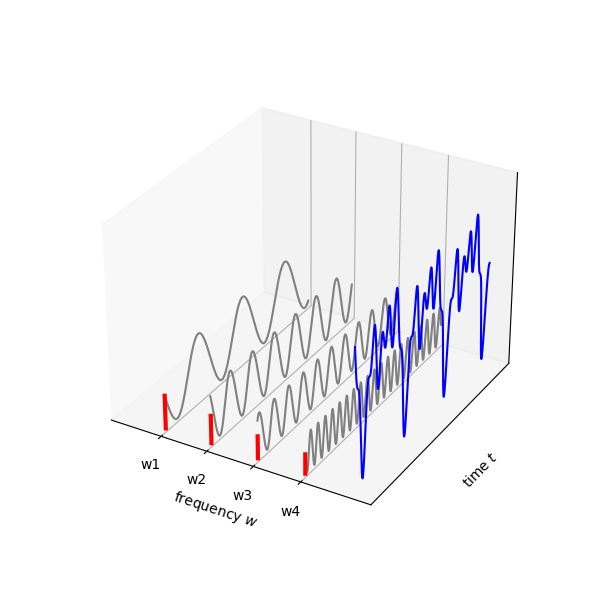

In [44]:
def convert_wave_to_3dplot_convention(x, y, scalar):
    xline = np.full_like(x, scalar)
    yline = x
    zline = y
    return xline, yline, zline

plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')

x = np.linspace(0, 100, 1000)
ys = list()
As = [1.2, 1, 0.8, 0.7]
Ts = [30, 15, 10, 5]
thetas = [math.pi*i for i in [1, 0.75, 0.25, -1]]
xticks = [i*3 for i in range(1, 5, 1)]
for A, T, theta, xtick, in zip(As, Ts, thetas, xticks):
    y = get_sinewave_y(A=A, T=T, theta=theta, x=x)
    y = y + np.max(y)
    
    # collect y to construct original function f(t)
    ys.append(y)

    # convert to follow 3d plotting convention
    xline, yline, zline = convert_wave_to_3dplot_convention(x, y, xtick)
    ax.plot3D(xline, yline, zline, 'gray')
    # ax.plot(x, y, zs=0, zdir='y')


# plot original function f(t)
y = np.sum(ys, axis=0)
xline, yline, zline = convert_wave_to_3dplot_convention(x, y, 15)
ax.plot3D(xline, yline, zline, 'blue')

# plot amplitude spectrum
for A, xtick in zip(As, xticks):
    ax.plot([xtick, xtick], [0, 0], [0, A], linewidth=3, c='red')


# determine the bound of 3d plot
ax.axes.set_xlim3d(left=0, right=16)
ax.axes.set_ylim3d(bottom=-1, top=100)
ax.axes.set_zlim3d(bottom=0, top=np.max(y)+1)

ax.set_xlabel(r'frequency $w$')
ax.set_xticks(xticks)
ax.set_xticklabels([r'w'+f'{i}' for i in [1, 2, 3, 4]])
ax.set_ylabel(r'time $t$')
ax.set_yticks([])
ax.set_zticks([])

plt.show()

### Any sinunoid can be expressed as a combination of a sine and cosine.

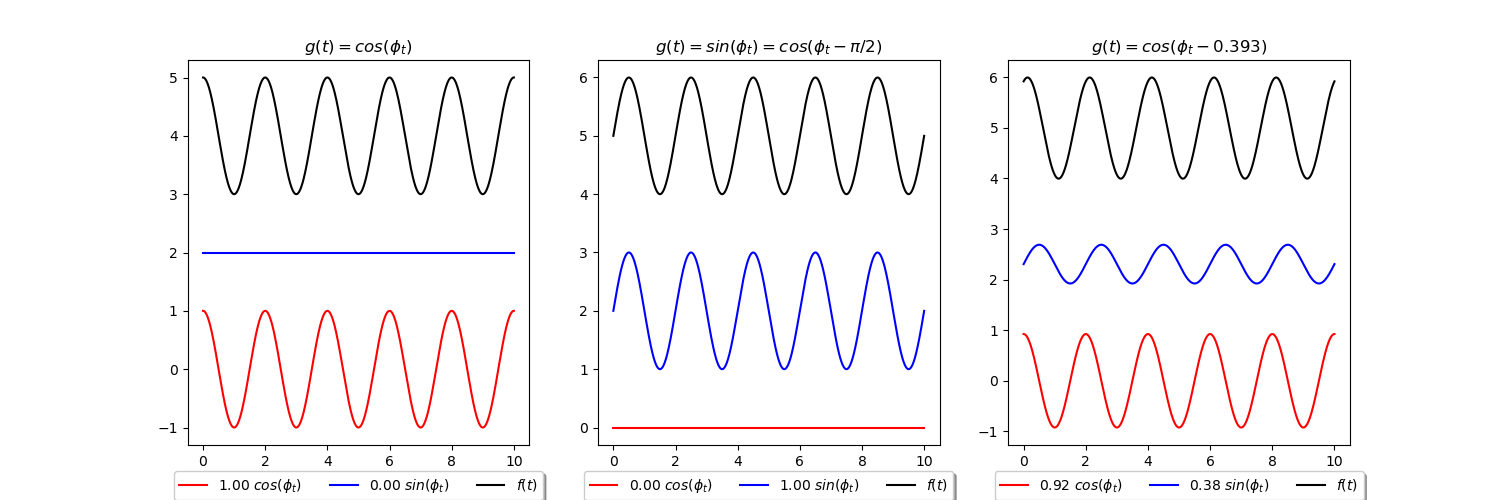

In [45]:
def get_cosinewave_y(A, T, theta, x):
    y = [A * math.cos(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def get_sinewave_y(A, T, theta, x):
    y = [A * math.sin(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def plot_ft_sine_cosine(ax, theta, A, T, title):

    # original sinusoid
    x = np.linspace(0, 10, 1000)

    # cosine wave
    C = A * math.cos(theta)
    mean_shift_in_y_axis = 0
    cosine = get_cosinewave_y(C, T, 0, x) 
    ax.plot(x, cosine + mean_shift_in_y_axis, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 

    # sine wave
    D = A * math.sin(theta)
    mean_shift_in_y_axis = C + 1 + D
    sine = get_sinewave_y(D, T, 0, x)
    ax.plot(x, sine + mean_shift_in_y_axis, 'blue', label=f'{D:.2f} ' + r'$ sin(\phi_t)$') 

    # reconstructed sinusoid
    mean_shift_in_y_axis += C + D*2 + 1
    ax.plot(x, sine + cosine + mean_shift_in_y_axis, 'black', label= r'$f(t)$')

    ax.set_title(title)
    ax.set_xlabel(r'time t')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

f, ax_list = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
settings = [
    [0., 1, 2, r'$g(t) = cos (\phi_t)$'],
    [math.pi/2, 1, 2, r'$g(t) =  sin (\phi_t) = cos (\phi_t - \pi/2)$'],
    [0.393, 1, 2, r'$g(t) = cos(\phi_t - 0.393)$'],
]
for ax, setting in zip(ax_list, settings):
    theta, A, T, title = setting
    plot_ft_sine_cosine(ax, theta, A, T, title)
plt.show()


### Orthogonality properties of sinunoidal basis function

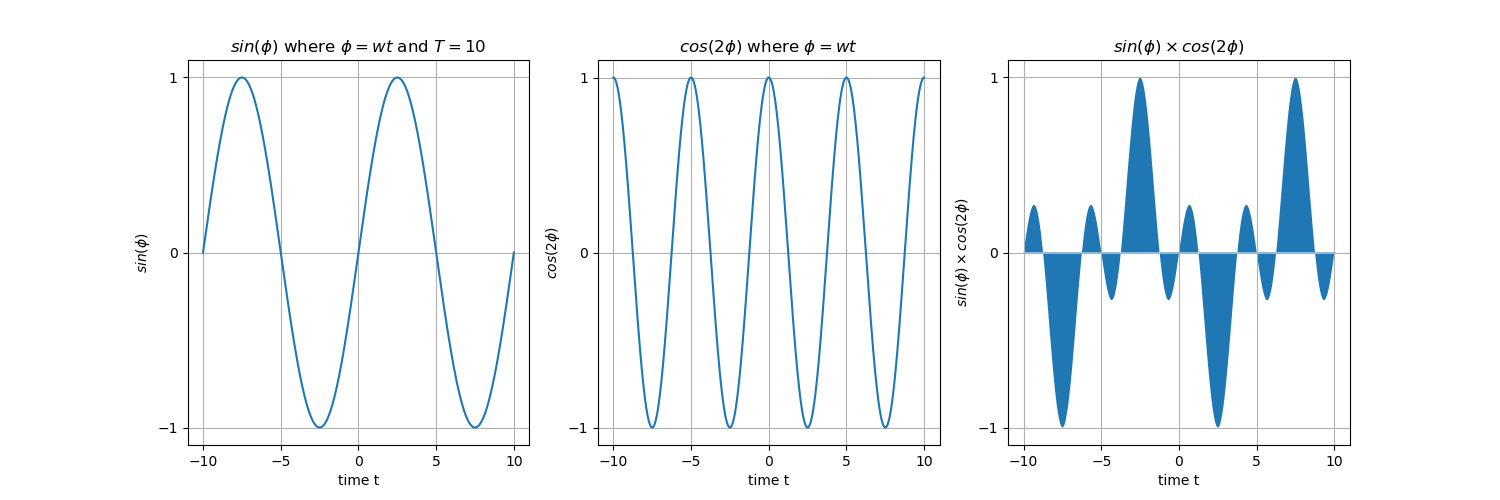

In [46]:
def get_cosinewave_y(A, T, theta, x):
    y = [A * math.cos(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def get_sinewave_y(A, T, theta, x):
    y = [A * math.sin(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def multiply_waves(Y1, Y2):
    return np.multiply(Y1, Y2)


def plot_sine_cos(ax_list):
    ax0, ax1, ax2 = ax_list
    x = np.linspace(-10, 10, 1000)

    # sine wave
    sin_y = get_sinewave_y(A=1, T=10, theta=0, x=x)
    ax0.plot(x, sin_y)#, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 
    ax0.set_yticks([-1, 0, 1])
    ax0.set_title(r'$sin (\phi)$ where $\phi=wt$ and $T=10$')
    ax0.set_xlabel(r'time t')
    ax0.set_ylabel(r'$sin (\phi)$')
    ax0.grid()

    # cosine wave
    cos_y = get_cosinewave_y(A=1, T=5, theta=0, x=x)
    ax1.plot(x, cos_y)#, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 
    ax1.set_yticks([-1, 0, 1])
    ax1.set_title(r'$cos (2\phi)$ where $\phi=wt$')
    ax1.set_xlabel(r'time t')
    ax1.set_ylabel(r'$cos (2\phi)$')
    ax1.grid()

    # sin X cosine wave
    y = multiply_waves(sin_y, cos_y)
    ax2.fill_between(x, y, 0)#, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 
    ax2.set_yticks([-1, 0, 1])
    ax2.set_title(r'$sin (\phi) \times cos (2\phi)$')
    ax2.set_xlabel(r'time t')
    ax2.set_ylabel(r'$sin (\phi) \times cos (2\phi)$')
    ax2.grid()

    
f, ax_list = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

plot_sine_cos(ax_list)
plt.show()

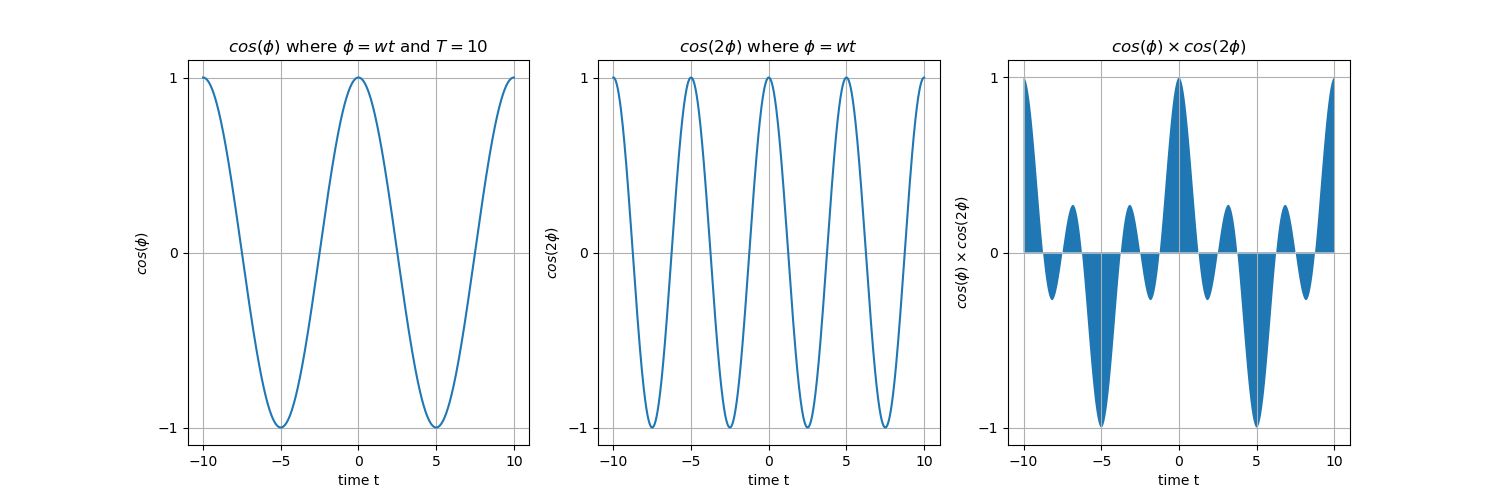

In [47]:
def get_cosinewave_y(A, T, theta, x):
    y = [A * math.cos(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def get_sinewave_y(A, T, theta, x):
    y = [A * math.sin(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def multiply_waves(Y1, Y2):
    return np.multiply(Y1, Y2)


def plot_cos_cos(ax_list):
    ax0, ax1, ax2 = ax_list
    x = np.linspace(-10, 10, 1000)

    # cosine wave
    cos_y_1 = get_cosinewave_y(A=1, T=10, theta=0, x=x)
    ax0.plot(x, cos_y_1)#, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 
    ax0.set_yticks([-1, 0, 1])
    ax0.set_title(r'$cos (\phi)$ where $\phi=wt$ and $T=10$')
    ax0.set_xlabel(r'time t')
    ax0.set_ylabel(r'$cos (\phi)$')
    ax0.grid()

    # cosine wave
    cos_y_2 = get_cosinewave_y(A=1, T=5, theta=0, x=x)
    ax1.plot(x, cos_y_2)#, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 
    ax1.set_yticks([-1, 0, 1])
    ax1.set_title(r'$cos (2\phi)$ where $\phi=wt$')
    ax1.set_xlabel(r'time t')
    ax1.set_ylabel(r'$cos (2\phi)$')
    ax1.grid()

    # sin X cosine wave
    y = multiply_waves(cos_y_1, cos_y_2)
    ax2.fill_between(x, y, 0)#, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 
    ax2.set_yticks([-1, 0, 1])
    ax2.set_title(r'$cos (\phi) \times cos (2\phi)$')
    ax2.set_xlabel(r'time t')
    ax2.set_ylabel(r'$cos (\phi) \times cos (2\phi)$')
    ax2.grid()

    
f, ax_list = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

plot_cos_cos(ax_list)
plt.show()

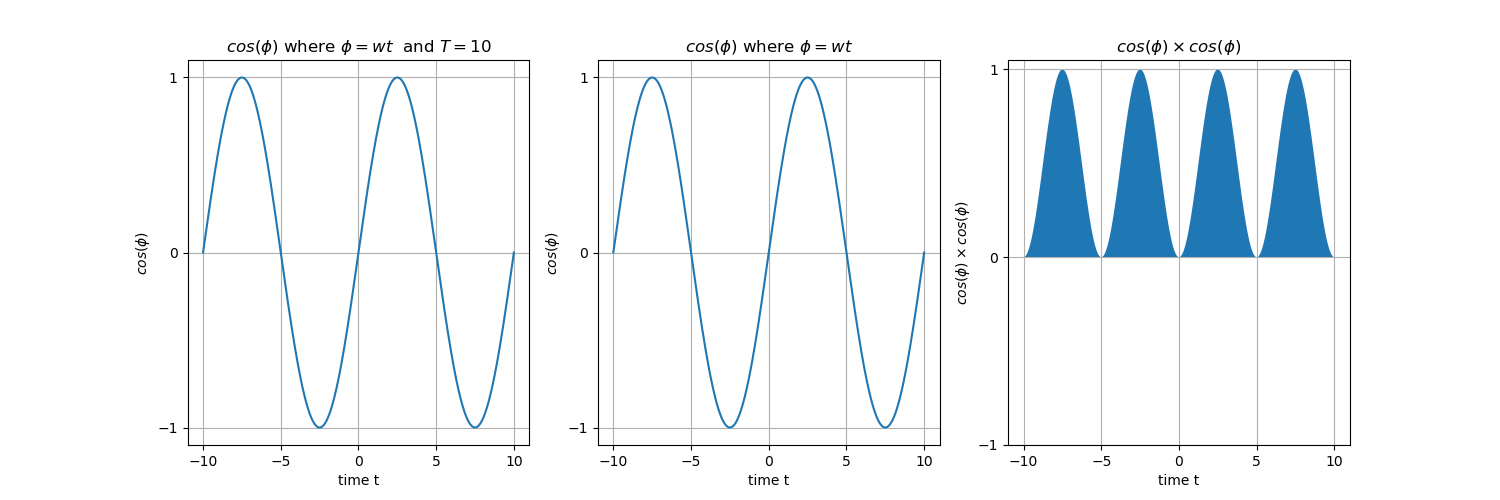

In [48]:
def get_cosinewave_y(A, T, theta, x):
    y = [A * math.cos(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def get_sinewave_y(A, T, theta, x):
    y = [A * math.sin(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def multiply_waves(Y1, Y2):
    return np.multiply(Y1, Y2)


def plot_cos_cos(ax_list):
    ax0, ax1, ax2 = ax_list
    x = np.linspace(-10, 10, 1000)

    # cosine wave
    cos_y = get_sinewave_y(A=1, T=10, theta=0, x=x)
    ax0.plot(x, cos_y)#, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 
    ax0.set_yticks([-1, 0, 1])
    ax0.set_title(r'$cos (\phi)$ where $\phi=wt$  and $T=10$')
    ax0.set_xlabel(r'time t')
    ax0.set_ylabel(r'$cos (\phi)$')
    ax0.grid()

    # cosine wave
    ax1.plot(x, cos_y)#, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 
    ax1.set_yticks([-1, 0, 1])
    ax1.set_title(r'$cos (\phi)$ where $\phi=wt$')
    ax1.set_xlabel(r'time t')
    ax1.set_ylabel(r'$cos (\phi)$')
    ax1.grid()

    # sin X cosine wave
    y = multiply_waves(cos_y, cos_y)
    ax2.fill_between(x, y, 0)#, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 
    ax2.set_yticks([-1, 0, 1])
    ax2.set_title(r'$cos (\phi) \times cos (\phi)$')
    ax2.set_xlabel(r'time t')
    ax2.set_ylabel(r'$cos (\phi) \times cos (\phi)$')
    ax2.grid()

    
f, ax_list = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

plot_cos_cos(ax_list)
plt.show()

### Fourier transform

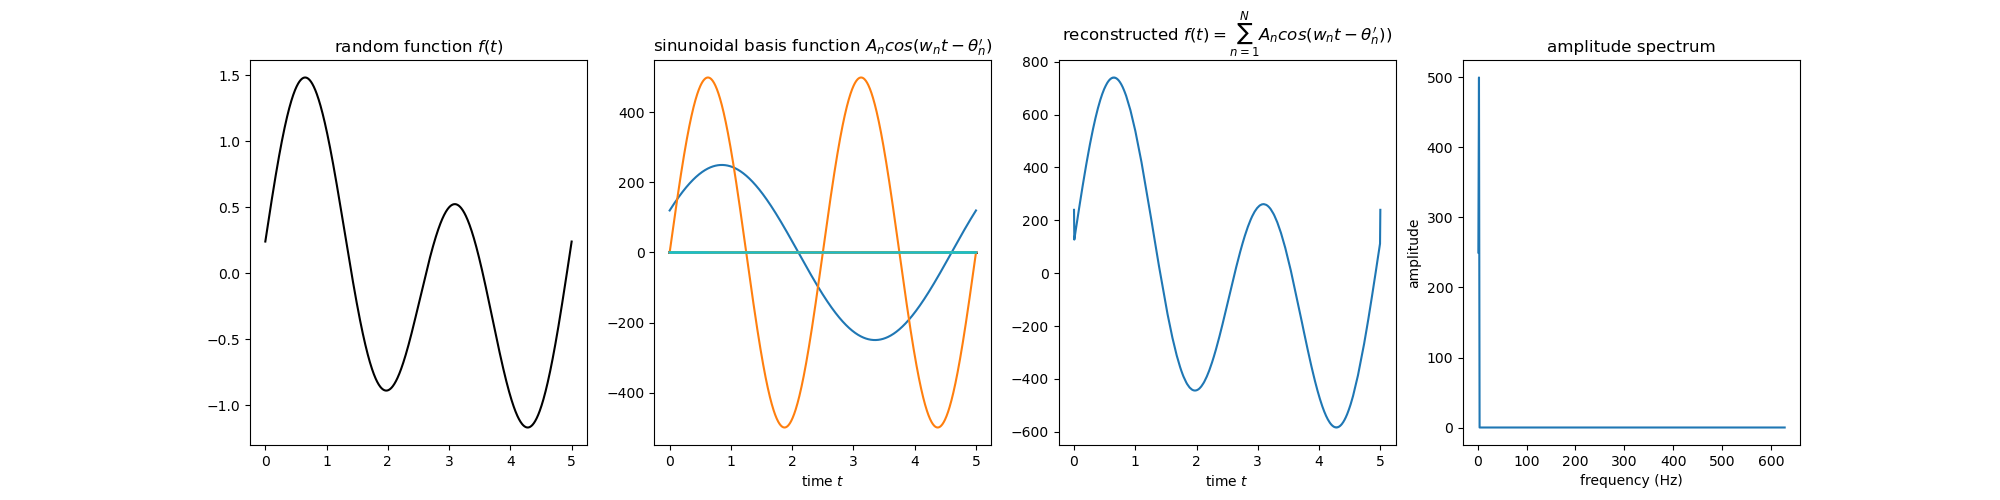

In [112]:
# The code is adapted from: https://github.com/jgvfwstone/Fourier/blob/main/fourierdemo.py

def get_sinewave_y(A, T, theta, x):
    y = [A * math.sin(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def get_cosinewave_y(A, T, theta, x):
    y = [A * math.cos(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def plus_waves(Y1, Y2):
    return Y1 +  Y2

def compute_integral_of_wave_multiplication(Y1, Y2):
    return np.dot(Y1, Y2) # inner product is equivalent to element-wise multiplication, then summation

def generate_curve_ft():
    T = 5
    x = np.linspace(0, T, 1000)
    sin_y1 = get_sinewave_y(1, 2.5, 0, x)
    sin_y2 = get_sinewave_y(0.5, 5, 0.5, x)
    ft = plus_waves(sin_y1, sin_y2)

    return x, ft, T

def fourier_transform(fundamental_frequency, n_frequencies):
    freqs, Cs, Ds = list(), list(), list()


    for n in range(1, n_frequencies+1, 1):
        harmony_freq_n = n * fundamental_frequency
        T_n = 2*math.pi/harmony_freq_n
        cosine_wave_freq_n = get_cosinewave_y(A=1, T=T_n, theta=0, x=x)
        C_n = compute_integral_of_wave_multiplication(ft, cosine_wave_freq_n)

        sine_wave_freq_n = get_sinewave_y(A=1, T=T_n, theta=0, x=x)
        D_n = compute_integral_of_wave_multiplication(ft, sine_wave_freq_n)

        freqs.append(harmony_freq_n)
        Cs.append(C_n)
        Ds.append(D_n)

    return freqs, np.array(Cs), np.array(Ds)

def compute_sinunoidal_basis_function(Cs, Ds, x):
    As = ((Cs**2 + Ds**2) ** 0.5)
    thetas = np.arctan(Ds / Cs)

    sinunoids = list()
    for harmony_freq_n, theta_n, A_n in zip(freqs, thetas, As):
        T_n = 2*math.pi/harmony_freq_n
        sinunoid_n = get_cosinewave_y(A=A_n, T=T_n, theta=-theta_n, x=x)
        sinunoids.append(sinunoid_n)

    return As, thetas, sinunoids

x, ft, T = generate_curve_ft()
fundamental_frequency = 2 * math.pi / T
n_frequencies = 500
freqs, Cs, Ds = fourier_transform(fundamental_frequency, n_frequencies)
As, thetas, sinunoids = compute_sinunoidal_basis_function(Cs, Ds, x)
reconstructed_ft = np.sum(sinunoids, axis=0)


f, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# original curve ft
ax0.plot(x, ft, color='black')
ax0.set_title(r'random function $f(t)$')
ax1.set_xlabel(r'time $t$')

# obtain sinunoidal basis function
for sinunoid_n in sinunoids:
    ax1.plot(x, sinunoid_n)
ax1.set_title(r'sinunoidal basis function $A_n cos(w_nt - \theta^\prime_n)$')
ax1.set_xlabel(r'time $t$')

# reconstructed functions
ax2.plot(x, reconstructed_ft)
ax2.set_title(r'reconstructed $f(t) = \sum_{n=1}^N A_n cos(w_nt - \theta^\prime_n))$')
ax2.set_xlabel(r'time $t$')

# amplitude spectrum
ax3.plot(freqs,As)
ax3.set_xlabel('frequency (Hz)')
ax3.set_ylabel('amplitude')
ax3.set_title('amplitude spectrum')
plt.show()


In [104]:
len(reconstructed_ft)

1000

In [ ]:
frequency = 500; 
# insert this frequency Hz
T = 0.5; # length of signal in seconds

period = 1/frequency; # in seconds
R = 44100; # set sampling rate, samples/s
N = R*T; # number of samples in T seconds
tvec = np.arange(0, N, 1)/R; 
# time vector in units of seconds

# make vector containg 1 frequency = 1/period.
x1 = 2 * np.pi * tvec/period;

# signal in which each interval of period 
# seconds increases by 1.5*2*pi.
x2 = 1.5*x1; # make sinusoids
x = np.sin(x1);
x = x + 0.5*np.sin(x2);    

In [91]:
plt.close('all')